# 다항회귀
* 회귀가 독립변수의 일차식이 아닌 2차, 3차식 등 다항식으로 표현되는 회귀식
* 선셩회귀임

## 사이킷런 PolynomialFeatures 사용

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [5]:
poly = PolynomialFeatures(degree=2) #degree : 차수

#transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2)

poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [24]:
X2 = np.arange(9).reshape(3,3)
print(X2)
#transform from (x1, x2, x3) to (1, x1, x2, x3, x1^2, x1*x2, x1*x3, x2^2, x2*x3, x3^2)
poly.fit_transform(X2)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [7]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature : \n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값 : 
 [  5 125]


## 3차 다항식 계수의 피쳐값과 3차 다항식 결정값으로 학습

In [13]:
from sklearn.linear_model import LinearRegression

X = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature : \n', X)

#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feutre : \n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학스 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
3차 다항식 계수 feutre : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :  (10,)


## 사이킷런 파이프 라인 활용

In [11]:
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 가상 데이터 생성 및 다항 회귀 추정

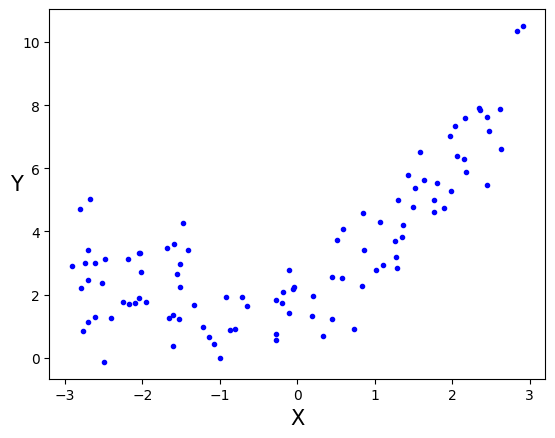

In [23]:
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X +2 +np.random.randn(m,1)

plt.plot(X, y, 'b.')
plt.ylabel('Y', fontsize=15, rotation=0)
plt.xlabel('X', fontsize=15)
plt.show()

## 다항식으로 변환

In [17]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

## 선형회귀 Linear Regression 적용하여 회귀 계수 추정

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88242263]), array([[1.04425067, 0.51062866]]))

## 다항회귀식 시각화

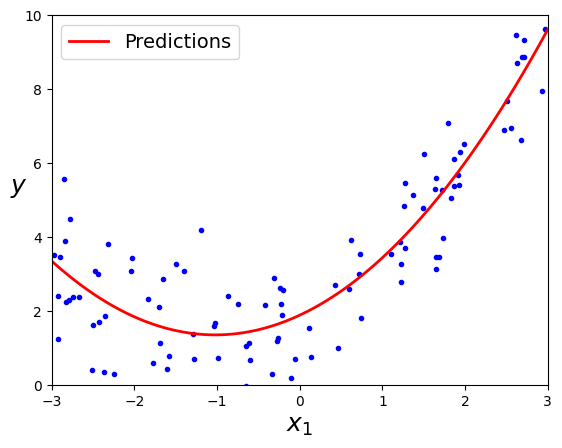

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()